In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

bohr_magneton = 93.4376

cls = ['#17707B','#70A551','#F9B859','#F6926A','#80173A']

In [2]:
def load_constraint(filelist):
    mlist, dlist = np.empty(0),np.empty(0)
    for file in filelist:
        md = np.loadtxt('ConstraintFiles/'+file)
        m,d = md[:,0],md[:,1]
        mlist = np.append(mlist,m)
        dlist = np.append(dlist,d)
    return mlist,dlist

In [24]:
constraints,labels,label_position,label_angle,projected,colors = {},{},{},{},{},{}
label_position_dtau = {}
label_angle_dtau = {}
dist = {}

# # CCM_low
# constraints['CCM_low'] = load_constraint(['CCM/lowbkg_constraint.txt'])
# labels['CCM_low'] = 'CCM Low Bkg'
# label_position['CCM_low'] = (30,5e-8)
# label_angle['CCM_low'] = -31
# projected['CCM_low'] = True

# # CCM_high
# constraints['CCM_high'] = load_constraint(['CCM/highbkg_constraint.txt'])
# labels['CCM_high'] = 'CCM High Bkg'
# label_position['CCM_high'] = (30,7e-8)
# label_angle['CCM_high'] = -31
# projected['CCM_high'] = True

# # CCM_low_dtau
# constraints['CCM_low_dtau'] = load_constraint(['CCM/lowbkg_constraint_dtau.txt'])
# labels['CCM_low_dtau'] = 'CCM Low Bkg'
# label_position['CCM_low_dtau'] = (30,5e-8)
# label_angle['CCM_low_dtau'] = -31
# projected['CCM_low_dtau'] = True

# # CCM_high_dtau
# constraints['CCM_high_dtau'] = load_constraint(['CCM/highbkg_constraint_dtau.txt'])
# labels['CCM_high_dtau'] = 'CCM High Bkg'
# label_position['CCM_high_dtau'] = (30,7e-8)
# label_angle['CCM_high_dtau'] = -31
# projected['CCM_high_dtau'] = True

# # IceCube
# constraints['IceCube'] = load_constraint(['IceCube_Schwetz.txt'])
# constraints['IceCube'] = ((constraints['IceCube'])[0],(constraints['IceCube'])[1])
# labels['IceCube'] = 'IceCube (6 Yr)'
# label_position['IceCube'] = (170,6.5e-8)
# label_angle['IceCube'] = -26.5
# projected['IceCube'] = True

# SBND
constraints['SBND'] = load_constraint(['SBND.txt'])
labels['SBND'] = 'SBND'
label_position['SBND'] = (260,1.6e-7)
label_angle['SBND'] = 20
projected['SBND'] = True

# SHiP_Main
constraints['SHiP_Main'] = load_constraint(['SHiP_Main.txt'])
labels['SHiP_Main'] = 'SHiP Main Det.'
label_position['SHiP_Main'] = (150,3.4e-8)
label_angle['SHiP_Main'] = -23
projected['SHiP_Main'] = True

# # SHiP_ECC
# constraints['SHiP_ECC'] = load_constraint(['SHiP_ECC.txt'])
# labels['SHiP_ECC'] = 'SHiP ECC Det.'
# label_position['SHiP_ECC'] = (700,5e-8)
# label_angle['SHiP_ECC'] = 0
# projected['SHiP_ECC'] = True

# NOMAD
constraints['NOMAD'] = load_constraint(['NOMAD.txt'])
constraints['NOMAD'] = ((constraints['NOMAD'])[0],np.sqrt(2)*(constraints['NOMAD'])[1])
# constraints['NOMAD'] = ((constraints['NOMAD'])[0],(constraints['NOMAD'])[1]/bohr_magneton)
labels['NOMAD'] = 'NOMAD'
label_position['NOMAD'] = (200,1.9e-6)
label_angle['NOMAD'] = -35
projected['NOMAD'] = False

# # NOMAD
# constraints['NOMADB'] = load_constraint(['NOMAD_BOTTOM.txt'])
# constraints['NOMADB'] = ((constraints['NOMADB'])[0],np.sqrt(2)*(constraints['NOMADB'])[1])
# constraints['NOMADB'] = ((constraints['NOMADB'])[0],(constraints['NOMADB'])[1]/bohr_magneton)
# labels['NOMADB'] = 'NOMD Bottom'
# label_position['NOMADB'] = (1000,2e-6)
# label_angle['NOMADB'] = 0
# projected['NOMADB'] = False


# CHARM
constraints['CHARM'] = load_constraint(['CHARM.txt'])
constraints['CHARM'] = (1000*(constraints['CHARM'])[0],bohr_magneton*(constraints['CHARM'])[1])
labels['CHARM'] = 'CHARM-II'
label_position['CHARM'] = (14,2.3e-7)
label_angle['CHARM'] = 0
projected['CHARM'] = False

# SK
constraints['SK'] = load_constraint(['Gustafson_SK.dat'])
midpoint = 20
sortidx_1 = np.argsort((constraints['SK'])[0][:midpoint])
sortidx_2 = midpoint+np.argsort((constraints['SK'])[1][midpoint:])
sortidx = np.append(sortidx_1,sortidx_2)
constraints['SK'] = (1000*(constraints['SK'])[0][sortidx],1000*(constraints['SK'])[1][sortidx])
labels['SK'] = 'SuperK'
label_position['SK'] = (55,6e-7)
label_angle['SK'] = 60
projected['SK'] = False

# SN1987A
constraints['SN1987A'] = load_constraint(['SN1987A.txt'])
labels['SN1987A'] = 'SN1987A'
label_position['SN1987A'] = (12,4.5e-8)
label_angle['SN1987A'] = 0
projected['SN1987A'] = False

# LSND
constraints['LSND'] = load_constraint(['LSND.txt'])
labels['LSND'] = 'LSND'
label_position['LSND'] = (40,5e-6)
label_angle['LSND'] = 0
projected['LSND'] = False

# Borexino
constraints['Borexino'] = load_constraint(['Plestid_borexino.dat'])
constraints['Borexino'] = (1000*(constraints['Borexino'])[0],1000*(constraints['Borexino'])[1])
labels['Borexino'] = 'Borexino'
label_position['Borexino'] = (12,0.8e-7)
label_position_dtau['Borexino'] = (12,0.8e-7)
label_angle['Borexino'] = 85
label_angle_dtau['Borexino'] = 85
projected['Borexino'] = False

# MINERvA
constraints['MINERvA'] = load_constraint(['MINERvA.txt'])
labels['MINERvA'] = r'MINER$\nu$A'
label_position['MINERvA'] = (445,2.2e-6)
label_angle['MINERvA'] = 70
projected['MINERvA'] = False

# # MINERvA dtau
# constraints['MINERvA_dtau'] = load_constraint(['MINERvA_dtau.txt'])
# labels['MINERvA_dtau'] = r'MINER$\nu$A'
# label_position['MINERvA_dtau'] = (70,3e-8)
# label_angle['MINERvA_dtau'] = 300
# projected['MINERvA_dtau'] = False

# # MB-angle
# constraints['MB_angle'] = load_constraint(['MiniBooNE/CosTheta_0.950_CL_Path0.txt'])
# labels['MB_angle'] = r'MiniBooNE $\cos \theta$'
# label_position['MB_angle'] = (12,2e-6)
# label_angle['MB_angle'] = 0
# projected['MB_angle'] = False
# colors['MB_angle'] = 'green'

# MB-angle
constraints['MB_angle_1'] = load_constraint(['MiniBooNE/CosTheta_0.950_CL_Path0.txt'])
labels['MB_angle_1'] = r'MiniBooNE $\cos \theta$ 95% CL'
label_position['MB_angle_1'] = (12,4e-6)
label_angle['MB_angle_1'] = 0
projected['MB_angle_1'] = False
colors['MB_angle_1'] = 'yellow'

# MB-energy
constraints['MB_energy'] = load_constraint(['MiniBooNE/EnuQE_0.950_CL_Path0.txt'])
labels['MB_energy'] = r'MiniBooNE $E_\nu^{\rm QE}$ 95% CL'
label_position['MB_energy'] = (12,3e-6)
label_angle['MB_energy'] = 0
projected['MB_energy'] = False
colors['MB_energy'] = 'green'

# # MB-energy
# constraints['MB_energy_dtau'] = load_constraint(['MiniBooNE/dtau_mtau_mmu/EnuQE_0.950_CL_Path0.txt'])
# labels['MB_energy_dtau'] = r'MiniBooNE $E_\nu^{\rm QE}$'
# label_position['MB_energy_dtau'] = (12,8e-6)
# label_angle['MB_energy_dtau'] = 0
# projected['MB_energy_dtau'] = False
# colors['MB_energy_dtau'] = 'deeppink'

# # MB-energy (second contonur)
# constraints['MB_energy_1'] = load_constraint(['MiniBooNE/EnuQE_0.950_CL_Path1.txt'])
# labels['MB_energy_1'] = ''
# label_position['MB_energy_1'] = (80,5e-7)
# label_angle['MB_energy_1'] = 0
# projected['MB_energy_1'] = False
# colors['MB_energy_1'] = 'pink'

# # ND280 Before Upgrade
# constraints['ND2801'] = load_constraint(['ND280_3y.txt'])
# labels['ND2801'] = r'2013'
# # label_position['ND280upgrd'] = (60,10e-7)
# # label_angle['ND280upgrd'] = 0
# label_position['ND2801'] = (600,1e-7)
# label_angle['ND2801'] = 70
# colors['ND2801'] = 'deeppink'
# projected['ND2801'] = False

# constraints['ND2802'] = load_constraint(['ND280_5y.txt'])
# labels['ND2802'] = r'2015'
# # label_position['ND280upgrd'] = (60,10e-7)
# # label_angle['ND280upgrd'] = 0
# label_position['ND2802'] = (600,1e-7)
# label_angle['ND2802'] = 70
# colors['ND2802'] = 'deeppink'
# projected['ND2802'] = False

constraints['ND280'] = load_constraint(['nd280.txt'])
labels['ND280'] = r'ND280 95% CL'
# label_position['ND280upgrd'] = (60,10e-7)
# label_angle['ND280upgrd'] = 0
label_position['ND280'] = (280,1.2e-7)
label_angle['ND280'] = 0
colors['ND280'] = 'deeppink'
projected['ND280'] = False

# # ND280 Upgrade
# constraints['ND280upgrd.5'] = load_constraint(['ND280+_6m.txt'])
# labels['ND280upgrd.5'] = r'6 months'
# # label_position['ND280upgrd'] = (60,10e-7)
# # label_angle['ND280upgrd'] = 0
# label_position['ND280upgrd.5'] = (610,1.2e-7)
# label_angle['ND280upgrd.5'] = 70
# colors['ND280upgrd.5'] = 'deeppink'
# projected['ND280upgrd.5'] = False

constraints['ND280upgrd1'] = load_constraint(['combo_y1.txt'])
labels['ND280upgrd1'] = r'1 year'
# label_position['ND280upgrd'] = (60,10e-7)
# label_angle['ND280upgrd'] = 0
label_position['ND280upgrd1'] = (610,1.2e-7)
label_angle['ND280upgrd1'] = 70
colors['ND280upgrd1'] = 'deeppink'
projected['ND280upgrd1'] = False

constraints['ND280upgrd2'] = load_constraint(['combo_y2.txt'])
labels['ND280upgrd2'] = r'2 years'
# label_position['ND280upgrd'] = (60,10e-7)
# label_angle['ND280upgrd'] = 0
label_position['ND280upgrd2'] = (610,1.2e-7)
label_angle['ND280upgrd2'] = 70
colors['ND280upgrd2'] = 'deeppink'
projected['ND280upgrd2'] = False

constraints['ND280upgrd'] = load_constraint(['combo_y3.txt'])
labels['ND280upgrd'] = r'ND280 and ND280$+$ 95% CL'
# label_position['ND280upgrd'] = (60,10e-7)
# label_angle['ND280upgrd'] = 0
label_position['ND280upgrd'] = (700,1.2e-7)
label_angle['ND280upgrd'] = 0
colors['ND280upgrd'] = 'deeppink'
projected['ND280upgrd'] = False

constraints['ND280+5sigma'] = load_constraint(['5sigma_combo.txt'])
labels['ND280+5sigma'] = r'Projected $5\sigma$ CL'
# label_position['ND280upgrd'] = (60,10e-7)
# label_angle['ND280upgrd'] = 0
label_position['ND280+5sigma'] = (700,1.2e-7)
label_angle['ND280+5sigma'] = 0
colors['ND280+5sigma'] = 'deeppink'
projected['ND280+5sigma'] = False

constraints['ND2805sigma'] = load_constraint(['5sigma.txt'])
labels['ND2805sigma'] = r'ND280 $5\sigma$ CL'
# label_position['ND280upgrd'] = (60,10e-7)
# label_angle['ND280upgrd'] = 0
label_position['ND2805sigma'] = (700,1.2e-7)
label_angle['ND2805sigma'] = 0
colors['ND2805sigma'] = 'darkorange'
projected['ND2805sigma'] = False

# constraints['d-1'] = load_constraint(['decay_distance.txt'])
# labels['d-1'] = r'$10$m'
# # label_position['ND280upgrd'] = (60,10e-7)
# # label_angle['ND280upgrd'] = 0
# label_position['d-1'] = (700,1.2e-7)
# label_angle['d-1'] = 0
# colors['d-1'] = 'deeppink'
# projected['d-1'] = False
# dist['d-1'] = 9.7e2

# constraints['d-2'] = load_constraint(['d_-2.txt'])
# labels['d-2'] = r'$1$cm'
# # label_position['ND280upgrd'] = (60,10e-7)
# # label_angle['ND280upgrd'] = 0
# label_position['d-2'] = (700,2.2e-7)
# label_angle['d-2'] = 0
# colors['d-2'] = 'deeppink'
# projected['d-2'] = False
# dist['d-2'] = 1e3

# constraints['d-3'] = load_constraint(['d_-3.txt'])
# labels['d-3'] = r'$0.1$cm'
# # label_position['ND280upgrd'] = (60,10e-7)
# # label_angle['ND280upgrd'] = 0
# label_position['d-3'] = (700,3.2e-7)
# label_angle['d-3'] = 0
# colors['d-3'] = 'deeppink'
# projected['d-3'] = False
# dist['d-3'] = 14e2

# constraints['d-0'] = load_constraint(['d_0.txt'])
# labels['d-0'] = r'$L=1$m'
# # label_position['ND280upgrd'] = (60,10e-7)
# # label_angle['ND280upgrd'] = 0
# label_position['d-0'] = (700,0.2e-7)
# label_angle['d-0'] = 0
# colors['d-0'] = 'deeppink'
# projected['d-0'] = False
# dist['d-0'] = 15e2

# constraints['d-10'] = load_constraint(['d_1.txt'])
# labels['d-10'] = r'$L=10$m'
# # label_position['ND280upgrd'] = (60,10e-7)
# # label_angle['ND280upgrd'] = 10
# label_position['d-10'] = (700,10.2e-7)
# label_angle['d-10'] = 10
# colors['d-10'] = 'deeppink'
# projected['d-10'] = False
# dist['d-10'] = 17e2


<>:61: SyntaxWarning: invalid escape sequence '\s'
<>:61: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3993778/3953419961.py:61: SyntaxWarning: invalid escape sequence '\s'
  plt.text( 500, 1.4e-6, '$\star$', color='black', fontsize=15)


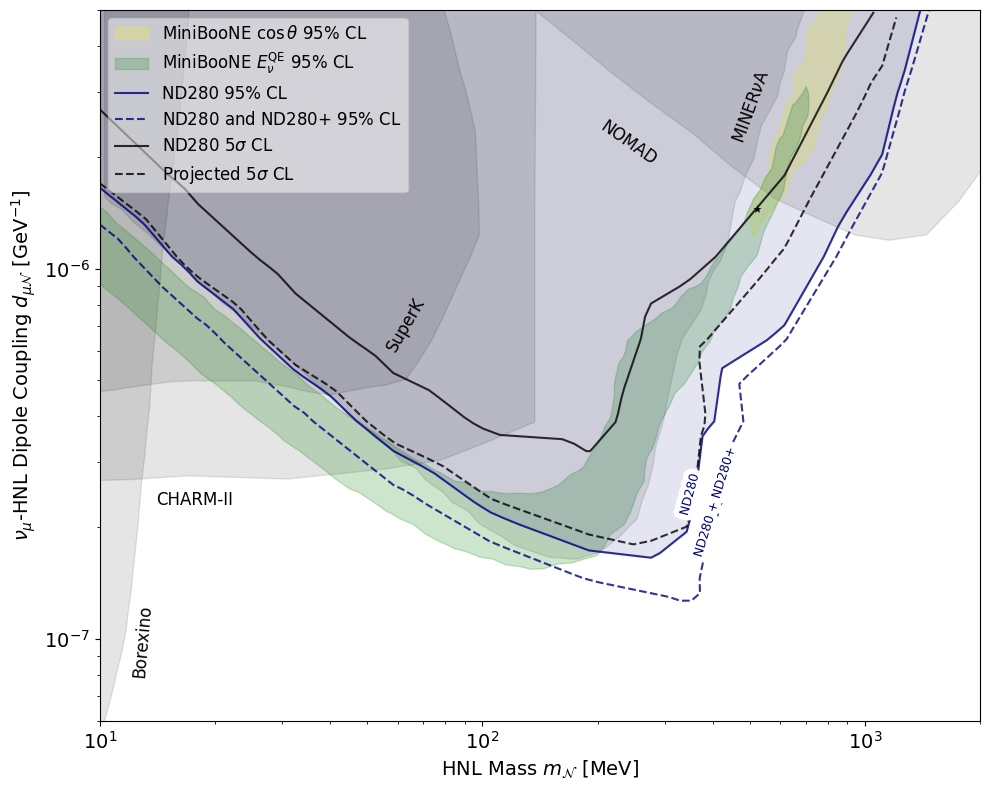

In [25]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from labellines import labelLine, labelLines

dtau_keys = ['MINERvA_dtau', 'MB_energy_dtau', 'MB_angle', 'LSND', 'SBND', 'SHiP_Main', 'SN1987A', 'ND280upgrd.5', 'ND2801','ND2802','ND280upgrd1', 'ND280upgrd2']
legend_keys = [ 'MB_angle_1', 'MB_energy','ND280', 'ND280upgrd','ND2805sigma', 'ND280+5sigma']  # Added 'ND280' here

fig = plt.figure(figsize=(10,8))
legend_handles = {}  # Dictionary to store plot handles for legend

for exp_key, (con_m, con_d) in constraints.items():
    if exp_key in dtau_keys or projected[exp_key]:
        continue
    if exp_key in ['ND280upgrd1', 'ND280upgrd2', 'ND280upgrd.5']:
        if exp_key =='ND280upgrd1': x0=640 
        elif exp_key =='ND280upgrd2': x0=640
        else: x0=540
        line, = plt.plot(con_m, con_d, alpha=1, linestyle='dashed', color='navy')
        labelLine(line, x=x0, label=labels[exp_key], ha='left', va='bottom', color='navy', fontsize=9, backgroundcolor='none')
    elif exp_key == 'ND280upgrd':
        line, = plt.plot(con_m, con_d, alpha=0.8, linestyle='dashed', color='navy')
        labelLine(line, x=380, label='ND280 + ND280+', ha='left', va='bottom', color='navy', fontsize=9, backgroundcolor='none')
        legend_handles[exp_key] = line
    elif exp_key in ['ND2801', 'ND2802']:
        line, = plt.plot(con_m, con_d, alpha=0.8, linestyle='dashed', color='navy')
        labelLine(line, x=120, label=labels[exp_key], ha='left', va='bottom', color='navy', fontsize=9, backgroundcolor='none')
    elif exp_key == 'ND280':
        line, = plt.plot(con_m, con_d, alpha=0.8, linestyle='solid', color='navy')
        labelLine(line, x=350, label='ND280', ha='left', va='bottom', color='navy', fontsize=9, backgroundcolor='none')
        fill = plt.fill_between(con_m, con_d, 1e-5, alpha=0.1, color='navy')
        legend_handles[exp_key] = line  # Use the line for the legend, not the fill
    elif exp_key in ['MB_angle_1', 'MB_energy']:
        color = colors[exp_key]
        fill = plt.fill_between(con_m, con_d, 1e-5, alpha=0.2, color=color)
        legend_handles[exp_key] = Patch(facecolor=color, edgecolor=color, alpha=0.2)
    elif exp_key in ['ND2805sigma']:
        line, = plt.plot(con_m, con_d, alpha=0.8, linestyle='solid', color='black')
        # labelLine(line, x=120, label='ND280 $5\sigma$', ha='left', va='bottom', color='black', fontsize=9, backgroundcolor='none')
        legend_handles[exp_key] = line
    elif exp_key in ['ND280+5sigma']:
        line, = plt.plot(con_m, con_d, alpha=0.8, linestyle='dashed', color='black')
        # labelLine(line, x=120, label='Projected $5\sigma$', ha='left', va='bottom', color='black', fontsize=9, backgroundcolor='none')
        legend_handles[exp_key] = line
    else:
        color = colors.get(exp_key, 'black')
        fill = plt.fill_between(con_m, con_d, 1e-5, alpha=0.1, color=color)
        plt.text(*label_position[exp_key], labels[exp_key], rotation=label_angle[exp_key], color='black', fontsize=12)
        legend_handles[exp_key] = Patch(facecolor=color, edgecolor=color, alpha=0.1)

# Add legend
legend_items = [legend_handles[key] for key in legend_keys if key in legend_handles]
legend_labels = [labels[key] for key in legend_keys if key in legend_handles]

plt.legend(handles=legend_items,
           labels=legend_labels,
           loc='upper left',
           fontsize=12,
           ncol=1,
           framealpha=0.5)
plt.text( 500, 1.4e-6, '$\star$', color='black', fontsize=15)

# Rest of your plotting code...
plt.loglog()
# plt.title(r'$d_{\tau \mathcal{N}} = 0$', fontsize=20)
plt.xlim(1e1, 2e3)
plt.ylim(6e-8, 5e-6)
plt.xticks(fontsize=14)
plt.xlabel(r'HNL Mass $m_\mathcal{N}$ [MeV]', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(r'$\nu_\mu$-HNL Dipole Coupling $d_{\mu\mathcal{N}}$ [GeV$^{-1}$]', fontsize=14)
plt.tight_layout()
plt.savefig('GlobalConstraints.pdf', dpi=200)
plt.show()